# News Commentaries of the U.S. Newsmakers
by [@tozCSS](https://twitter.com/tozCSS)

- Scraped the data from [thePlazz.com news site](https://web.archive.org/web/20150314213923/http://theplazz.com/)
- Source code and datasets are made available on [gitHub](https://github.com/oztalha/News-Commentary-Tweets-of-Elites)

In [56]:
import pandas as pd
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [5]:
cd ../

C:\Users\Talha\Documents\WinPython3\projects\News-Commentary-Tweets-of-Elites


In [23]:
df = pd.read_csv('data/US-headlines.csv',usecols=['newsdate','title','twcount'],parse_dates=[0])
df = df[~df.title.str.contains('The\s?Plazz')]
df13 = df[df['newsdate']<'2014-01-10']
df14 = df[df['newsdate']>='2014-01-10']
df.sort('twcount',ascending=False)

,newsdate,twcount,title
4922,2013-12-05,307,Apartheid resistance leader Mandela has died
4986,2013-11-28,270,"A day full of thanks, feasts and families"
7178,2013-02-24,227,Academy Awards 2013: cheers and jeers
4369,2014-01-28,199,Obama promises a year of action for 2014
4714,2013-12-24,196,Season’s tweetings: Tis time to gather ’round
4302,2014-02-02,192,Actor Philip Seymour Hoffman dead at 46
122,2014-12-31,181,Celeb greetings wish the happiest of new years
4660,2013-12-31,175,Billions ring in the New Year around the world
6439,2013-06-19,174,James Gandolfini dies of heart attack in Italy
2685,2014-06-10,174,Tea Party’s Brat hands Cantor primary defeat


In [65]:
# group by week
# kw_year = lambda x: str(x.year) + ' - ' + str(x.isocalendar()[1])
gw13 = df13.groupby(df['newsdate'].map(lambda x: x.isocalendar()[1])).sum()
gw14 = df14.groupby(df['newsdate'].map(lambda x: x.isocalendar()[1])).sum()
gm13 = df13.groupby(df['newsdate'].map(lambda x: x.month)).sum()
gm14 = df14.groupby(df['newsdate'].map(lambda x: x.month)).sum()

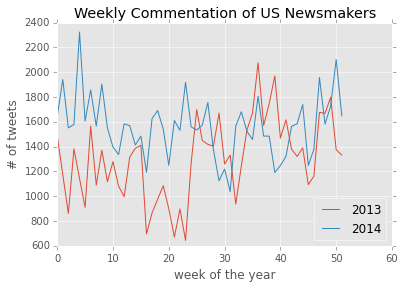

In [76]:
# is there a seasonal pattern that we see every year?
plt.plot(gw13);
plt.plot(gw14);
plt.legend(['2013','2014'],loc=4);
plt.title('Weekly Commentation of US Newsmakers');
plt.ylabel('# of tweets');
plt.xlabel('week of the year');

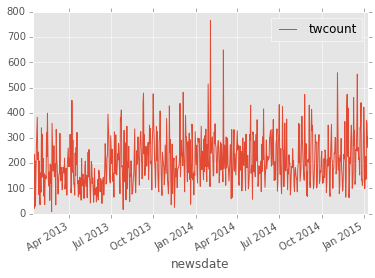

In [77]:
daily = df.groupby('newsdate').sum()
daily.plot()

In [8]:
data = Data([Scatter(x=daily.index,y=daily.twcount)])
twc = df.groupby('newsdate').apply(lambda t: t[t.twcount == t.twcount.max()])
titles = twc[twc.newsdate.isin(daily.sort('twcount',ascending=False).head(11).index.values)]
titles = titles.sort('twcount',ascending=False)
titles = titles.reset_index(drop=True)
titles = pd.merge(titles,daily,left_on='newsdate',right_index=True)
titles.rename(columns={'twcount_x': 'twcount', 'twcount_y': 'twdaily'}, inplace=True)
titles

,newsdate,twcount,title,twdaily
0,2013-12-05,307,Apartheid resistance leader Mandela has died,481
1,2014-01-28,199,Obama promises a year of action for 2014,514
2,2014-02-02,192,Actor Philip Seymour Hoffman dead at 46,767
3,2013-09-10,123,Obama: ‘exceptional’ US ‘doesn’t do pinpricks’,478
4,2014-12-17,99,Sony axes Christmas day release of ‘The Interv...,553
5,2014-12-09,98,CIA ‘Torture Report’ called ‘gruesome’,460
6,2014-03-02,96,And the Oscars for Best actors go to …,649
7,2014-08-25,91,And the Emmy Award goes to …,472
8,2014-11-04,83,GOP wrestles Senate majority from Dems,559
9,2013-10-01,76,"Government is closed, so now what?",475


In [14]:
def annotator(r):
    if (r['newsdate'] == pd.to_datetime('2013-10-01') or
        r['newsdate'] == pd.to_datetime('2014-12-09') or
        r['newsdate'] == pd.to_datetime('2014-12-17')):
        y = r['twdaily']-10 
    else:
        y = r['twdaily']+30
    return Annotation(x=r['newsdate'], y=y, xref='x', yref='y', text=r['title'], showarrow=False)

In [17]:
annotations = Annotations(map(annotator,titles.to_dict(orient='records')))
layout = Layout(title="News Commentary Tweet Counts of the U.S. Newsmakers (Jan 2013 - Jan 2015)",
                annotations=annotations,yaxis=YAxis(title='Daily tweet counts'))
fig = Figure(data=data, layout=layout)

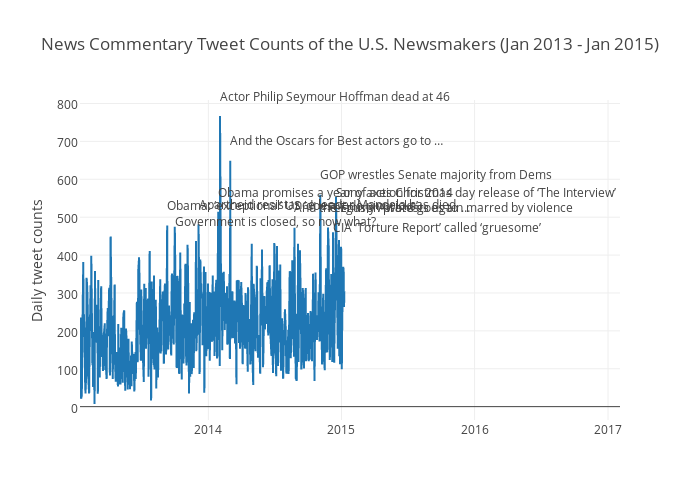

In [18]:
py.iplot(fig,filename="News Commentary Tweet Counts of the U.S. Newsmakers")

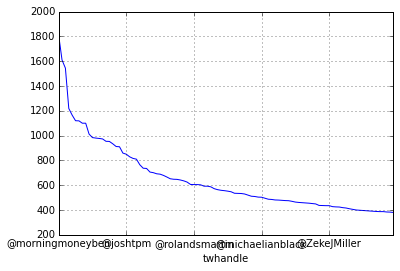

In [20]:
#these tweets belong to...
df = pd.read_csv('data/US-tweeps.csv',encoding='utf-8')
tweeps = df.groupby(by='twhandle')['twtext'].count().order(ascending=False).head(100)
tweeps.plot()

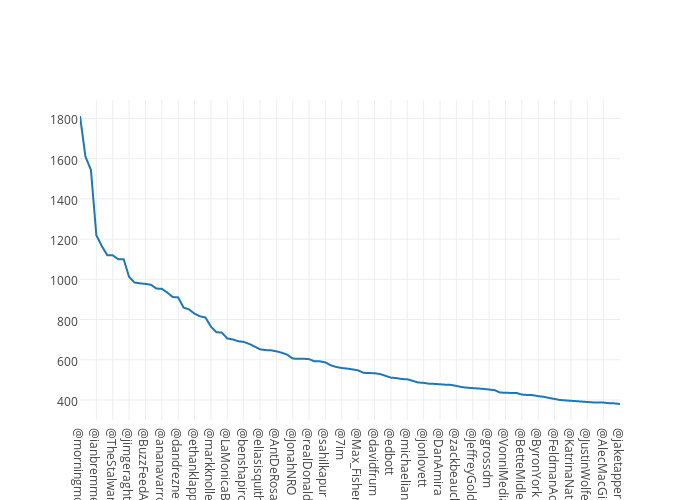

In [21]:
data = Data([Scatter(x=tweeps.index.values,y=tweeps.values)])
fig = Figure(data=data)
py.iplot(fig)